<a href="https://colab.research.google.com/github/mail2rathina/Rathina/blob/main/Image_Captioning_CNNmodel_DL_Rathina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# this is a subset of much larger data containing links to around 3.3M images and their captions
# i have downloaded 1800+ of these images for the session [ from the validation set]
# you can try working with larger set and see if that gives better results
# search google conceptual captions

In [2]:
!wget https://www.dropbox.com/s/2z3x3j0whlmnq98/images.zip

--2023-07-07 14:44:02--  https://www.dropbox.com/s/2z3x3j0whlmnq98/images.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2z3x3j0whlmnq98/images.zip [following]
--2023-07-07 14:44:03--  https://www.dropbox.com/s/raw/2z3x3j0whlmnq98/images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83c04ca1c2209c569dc795d5c8.dl.dropboxusercontent.com/cd/0/inline/B_YHn2emNvEDQq8k3OOyBIrF9Vr_Ms3pj7t9KTUIFEXsIXlYEl_ImiMdcJKNNCSeQOTCeEdiU2Ew1Q3MkEKgBrQNOoVRVxqKbqt5XL7MiJnMdAXWJAED_9JzolOHQnxy1oXyb5x3sINFXfgtzme7PFaSlz9GD4bZ35s_wMbbhO7R6Q/file# [following]
--2023-07-07 14:44:04--  https://uc83c04ca1c2209c569dc795d5c8.dl.dropboxusercontent.com/cd/0/inline/B_YHn2emNvEDQq8k3OOyBIrF9Vr_Ms3pj7t9KTUIFEXsIXlYEl_ImiMdcJKNNCSeQOTCeEdiU2Ew1Q3MkEK

In [3]:
!wget https://www.dropbox.com/s/zpmuhxhaizkuw53/image_caption_map.csv

--2023-07-07 14:44:33--  https://www.dropbox.com/s/zpmuhxhaizkuw53/image_caption_map.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zpmuhxhaizkuw53/image_caption_map.csv [following]
--2023-07-07 14:44:34--  https://www.dropbox.com/s/raw/zpmuhxhaizkuw53/image_caption_map.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc620a48560de6f2a373c8902fe2.dl.dropboxusercontent.com/cd/0/inline/B_YBtKKtlgyn8XjuLoCi7cx7UbXQi_JHr5qoM5cXzUqNTJny2xIamPJ9HqghohB8awY8eEwDPv7eOQ0zt8PIy__hjcHSBoXtQx-jxanLiX5wO6hny17kfLNmhhfILw4LoElCRmS9oXgj1VHCxQBek43G7tPHgcLW7ggdpWxcuidM_Q/file# [following]
--2023-07-07 14:44:35--  https://uc620a48560de6f2a373c8902fe2.dl.dropboxusercontent.com/cd/0/inline/B_YBtKKtlgyn8XjuLoCi7cx7UbXQi_JHr5qoM5cXzUqNTJny2xI

In [4]:
!unzip images.zip

Archive:  images.zip
   creating: content/images/
  inflating: content/images/326.jpg  
  inflating: content/images/1480.jpg  
  inflating: content/images/1217.jpg  
  inflating: content/images/1671.jpg  
  inflating: content/images/1262.jpg  
  inflating: content/images/1943.jpg  
  inflating: content/images/900.jpg  
  inflating: content/images/1701.jpg  
  inflating: content/images/800.jpg  
  inflating: content/images/1544.jpg  
  inflating: content/images/1731.jpg  
  inflating: content/images/74.jpg   
  inflating: content/images/2056.jpg  
  inflating: content/images/734.jpg  
  inflating: content/images/752.jpg  
  inflating: content/images/1773.jpg  
  inflating: content/images/1967.jpg  
  inflating: content/images/1201.jpg  
  inflating: content/images/918.jpg  
  inflating: content/images/1982.jpg  
  inflating: content/images/1447.jpg  
  inflating: content/images/1728.jpg  
  inflating: content/images/412.jpg  
  inflating: content/images/1589.jpg  
  inflating: content/i

In [5]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2023-07-07 14:44:57--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2023-07-07 14:44:57--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-07-07 14:44:57--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [6]:
!rm images.zip

In [7]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [8]:
!rm glove.42B.300d.zip

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input


In [10]:
encode_model = InceptionV3(weights='imagenet')
encode_model = Model(encode_model.input, encode_model.layers[-2].output)
WIDTH = 299
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq"
STOP = "endseq"
EPOCHS = 10
preprocess_input = inception.preprocess_input

96112376/96112376 [==============================] - 1s 0us/step


In [11]:
import tensorflow.keras.preprocessing.image as tf_image

In [12]:
def encodeImage(img):
  img = img.resize((WIDTH, HEIGHT))

  x = tf_image.img_to_array(img)

  x = np.expand_dims(x, axis=0)

  x = preprocess_input(x)

  x = encode_model.predict(x) # Get the encoding vector for the image
  x = np.reshape(x, OUTPUT_DIM )

  return x

In [13]:
import pandas as pd
data=pd.read_csv('image_caption_map.csv')

In [14]:
data.head(2)

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg


In [15]:
data['caption']=data['caption'].apply(lambda x:START+' '+x+' '+STOP)

In [16]:
import numpy as np

In [17]:
import os
check_files=os.listdir('/content/content/images/')

In [18]:
data.shape

(1832, 3)

In [19]:
data['file_name'].isin(check_files).sum()

1832

In [20]:
remove_these=[]
encoded_images={}
for i in range(data.shape[0]):
  image_path='/content/content/images/'+data['file_name'][i]
  try:
    img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
  except:
    print(i)
    remove_these.append(data['file_name'][i])
# some of the images are not in supported format
# we'll exclude thos

1/1 [==============================] - 0s 226ms/step
99
1/1 [==============================] - 0s 225ms/step
166
1/1 [==============================] - 0s 225ms/step
208
1/1 [==============================] - 0s 406ms/step
239
1/1 [==============================] - 0s 228ms/step
249
1/1 [==============================] - 0s 224ms/step
292
1/1 [==============================] - 0s 235ms/step
335
1/1 [==============================] - 0s 231ms/step
463
1/1 [==============================] - 0s 231ms/step
468
1/1 [==============================] - 0s 225ms/step
480
1/1 [==============================] - 0s 221ms/step
491
1/1 [==============================] - 0s 222ms/step
495
1/1 [==============================] - 0s 234ms/step
541
1/1 [==============================] - 0s 218ms/step
561
1/1 [==============================] - 0s 229ms/step
621
1/1 [==============================] - 0s 227ms/step
631
1/1 [==============================] - 0s 231ms/step
668
1/1 [===========================

In [21]:
remove_these

['111.jpg',
 '189.jpg',
 '237.jpg',
 '270.jpg',
 '280.jpg',
 '335.jpg',
 '381.jpg',
 '530.jpg',
 '539.jpg',
 '552.jpg',
 '564.jpg',
 '568.jpg',
 '619.jpg',
 '648.jpg',
 '718.jpg',
 '730.jpg',
 '772.jpg',
 '839.jpg',
 '1015.jpg',
 '1090.jpg',
 '1187.jpg',
 '1239.jpg',
 '1251.jpg',
 '1263.jpg',
 '1298.jpg',
 '1313.jpg',
 '1409.jpg',
 '1430.jpg',
 '1443.jpg',
 '1457.jpg',
 '1560.jpg',
 '1605.jpg',
 '1643.jpg',
 '1651.jpg',
 '1681.jpg',
 '1835.jpg',
 '1870.jpg',
 '1890.jpg',
 '1897.jpg',
 '1976.jpg',
 '2031.jpg',
 '2079.jpg']

In [22]:
data=data[-data['file_name'].isin(remove_these)]

In [23]:
data.shape

(1790, 3)

In [24]:
data

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg
...,...,...,...
1827,startseq person and groom embrace under the ve...,https://static1.squarespace.com/static/564125d...,2082.jpg
1828,startseq a bronze horse head sculpture against...,http://l7.alamy.com/zooms/39b15fd8b3af47bf9a7b...,2084.jpg
1829,startseq use a large mirror to make a small be...,https://cdn.homedit.com/wp-content/uploads/201...,2085.jpg
1830,startseq model and person attend awards endseq,https://media.gettyimages.com/photos/musician-...,2086.jpg


In [25]:
data.reset_index(drop=True,inplace=True)

In [26]:
data['id']=[int(data['file_name'][i].split('.')[0]) for i in range(data.shape[0])]

In [27]:
len(encoded_images)

1790

In [ ]:
# clean up captions

In [28]:
from string import punctuation

In [29]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
import re

In [31]:
data['caption']=data['caption'].apply(lambda x:re.sub("["+punctuation+"]",' ',x))

In [32]:
data['caption']=data['caption'].apply(lambda x:re.sub("\d",' ',x))

In [33]:
data['caption']=data['caption'].apply(lambda x:re.sub("\s+",' ',x))

In [34]:
data['caption']=data['caption'].str.lower()

In [35]:
data['caption']

0       startseq author a life in photography in pictu...
1       startseq photograph of the sign being repaired...
2       startseq the player staring intently at a comp...
3       startseq globes the green d person carrying in...
4       startseq the bedroom stone cottage can sleep p...
                              ...                        
1785    startseq person and groom embrace under the ve...
1786    startseq a bronze horse head sculpture against...
1787    startseq use a large mirror to make a small be...
1788       startseq model and person attend awards endseq
1789    startseq abstract background laser light multi...
Name: caption, Length: 1790, dtype: object

In [36]:
from nltk import word_tokenize

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
word_count_threshold = 5
word_counts = {}
for caption in data['caption']:
    for w in word_tokenize(caption):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d ==> %d' % (len(word_counts), len(vocab)))

preprocessed words 3714 ==> 574


In [39]:
caption_lens=[]
for caption in data['caption']:
  words=word_tokenize(caption)
  words=[w for w in words if w in vocab]
  caption_lens.append(len(words))
max_length=max(caption_lens)

In [40]:
idxtoword = {}
wordtoidx = {}

ix = 1
for w in vocab:
    wordtoidx[w] = ix
    idxtoword[ix] = w
    ix += 1

vocab_size = len(idxtoword) + 1
vocab_size

575

In [41]:
max_length=max(caption_lens)

In [42]:
max_length

25

In [43]:

embeddings_index = {}
f = open( 'glove.42B.300d.txt', encoding="utf-8")

for line in f:
    line=line.strip()
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print(f'Found {len(embeddings_index)} word vectors.')

Found 1917494 word vectors.


In [44]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [46]:
data.shape

(1790, 4)

In [47]:
def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
  # x1 - Training data for photos
  # x2 - The caption that goes with each photo
  # y - The predicted rest of the caption
  x1, x2, y = [], [], []
  n=0
  while True:
    for k,caption in enumerate(data['caption']):
      n+=1
      photo = encoded_images[data['id'][k]]
      # Each photo has 5 descriptions
      seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]
        # Generate a training case for every possible sequence and outcome
      for i in range(1, len(seq)):
        in_seq, out_seq = seq[:i], seq[i]
        in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
        out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
        x1.append(photo)
        x2.append(in_seq)
        y.append(out_seq)
      if n==num_photos_per_batch:
        yield ([np.array(x1), np.array(x2)], np.array(y))
        # next when generator gets called iteration will start from where we left off
        # this makes it make a pass through the complete data in an epoch
        x1, x2, y = [], [], []
        n=0

In [48]:
len(encoded_images.keys())

1790

In [51]:
data.shape

(1790, 4)

In [ ]:
# data_generator(data, encoded_images, wordtoidx, max_length, 1)

In [52]:
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,add

In [53]:
inputs1 = Input(shape=(OUTPUT_DIM,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
caption_model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [54]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [55]:
number_pics_per_batch = 3
steps = len(data['caption'])//number_pics_per_batch

In [56]:
encoded_images[99].shape

(2048,)

In [57]:
for i in range(EPOCHS*2):
  generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)






<ipython-input-57-4e5903ac9d40>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


596/596 [==============================] - 67s 113ms/step - loss: 1.6307


In [58]:
from tqdm import tqdm

In [59]:
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 6
steps = len(data['caption'])//number_pics_per_batch

for i in tqdm(range(EPOCHS)):
    generator = data_generator(data, encoded_images, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-59-1c6409caae3b>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  caption_model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)


298/298 [==============================] - 47s 158ms/step - loss: 1.9343


 10%|█         | 1/10 [00:47<07:05, 47.24s/it]

298/298 [==============================] - 46s 155ms/step - loss: 1.7850


 20%|██        | 2/10 [02:09<09:01, 67.67s/it]

298/298 [==============================] - 47s 158ms/step - loss: 1.7366


 30%|███       | 3/10 [03:31<08:39, 74.20s/it]

298/298 [==============================] - 47s 157ms/step - loss: 1.6796


 40%|████      | 4/10 [04:18<06:20, 63.46s/it]

298/298 [==============================] - 46s 156ms/step - loss: 1.6579


 50%|█████     | 5/10 [05:04<04:46, 57.34s/it]

298/298 [==============================] - 46s 155ms/step - loss: 1.6189


 60%|██████    | 6/10 [05:50<03:34, 53.53s/it]

298/298 [==============================] - 46s 153ms/step - loss: 1.5941


 70%|███████   | 7/10 [07:12<03:08, 62.83s/it]

298/298 [==============================] - 46s 155ms/step - loss: 1.5631


 80%|████████  | 8/10 [08:34<02:17, 68.93s/it]

298/298 [==============================] - 47s 158ms/step - loss: 1.5434


 90%|█████████ | 9/10 [09:56<01:13, 73.00s/it]

298/298 [==============================] - 48s 161ms/step - loss: 1.5261


100%|██████████| 10/10 [10:44<00:00, 64.46s/it]


In [60]:
caption_model.save_weights('caption_model.hdf5')

In [61]:
def generateCaption(photo):
    in_text = START
    for i in range(max_length):
        sequence = [wordtoidx[w] for w in in_text.split() if w in wordtoidx]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = caption_model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idxtoword[yhat]
        in_text += ' ' + word
        if word == STOP:
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

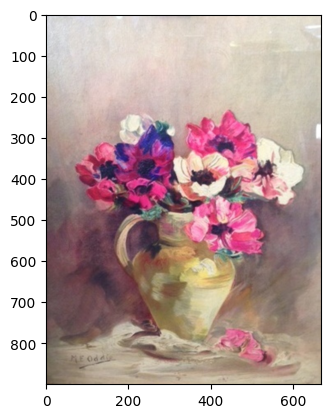

Caption: a of a


In [62]:
index=79
image_file=data.iloc[index,2]

image=encoded_images[int(image_file.split('.')[0])]

image = image.reshape((1,OUTPUT_DIM))
x=plt.imread('/content/content/images/'+image_file)
plt.imshow(x)
plt.show()
print("Caption:",generateCaption(image))
